In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as  np
from scipy import signal
import scipy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from ipywidgets import interactive
from IPython.display import HTML
import datetime
import math
from sklearn import model_selection
import sklearn.ensemble
import sklearn
import warnings

In [5]:
data_path = "..\\Datasets\\Forecasting_aqua\\ctd_meteo_aua_2019to2021_V2.csv"
format = "%d-%m-%Y"
df = pd.read_csv(data_path)
time_df = pd.to_datetime(df["Datetime"], format=format)
try:
    df.drop("sample",axis=1,inplace=True)
except:
    pass
df['Datetime']= time_df
keys_imp = ['ciliate','mean_chla','cv_chla_day','cv_chla_depth',
            'nauplius','Ammonium','Nitrat','mean_schmidt','windspeed_max',
            'mean_thermocline_depth','mean_epi_temp','mean_oxycline_depth',
            'mean_mixed_layer_depth','mean_global_radiation'
           ]
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day

#drop the first datapoints the first months are only meteorological data
first_point = (~df['mean_chla'].isnull()).idxmax()
dfs = df.drop(index=range(first_point))
df = dfs.reset_index(drop=True)


In [6]:
#prepare the tickslabels
months=[]
fday = []
for day in range(1,366):
    dstr = str(day)
    date = datetime.datetime.strptime("2019-" + dstr, "%Y-%j")
    months.append(date.strftime("%b"))
months,fday = np.unique(months,return_index=True)
#the months are not in order, but the ticks are still correct
print(months)
print(fday)

['Apr' 'Aug' 'Dec' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[ 90 212 334  31   0 181 151  59 120 304 273 243]


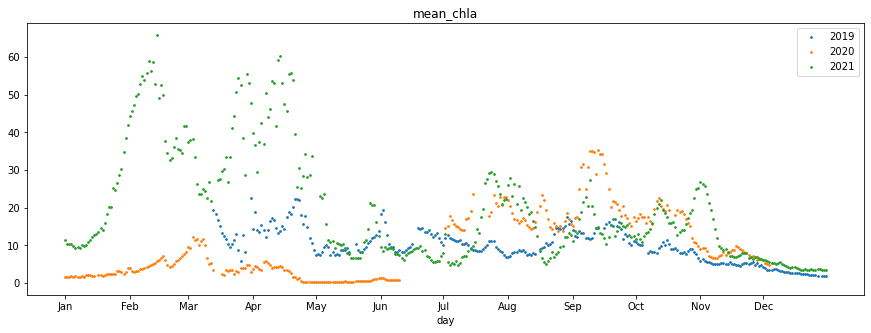

In [7]:
key = 'mean_chla'
fig,ax = plt.subplots(1,figsize=(15,5))

years = df['year'].unique()
for year in years:
    dfy = df[df['year']==year]
    yeardt = np.datetime64(str(year),'Y')
    n_days = (dfy['Datetime']-yeardt).dt.days
    ax.scatter(n_days,dfy[key],s=3)
ax.legend([str(year) for year in years])
ax.set_title(key)
ax.set_xlabel("day")
ax.set_xticks(fday)
ax.set_xticklabels(months)
plt.show()

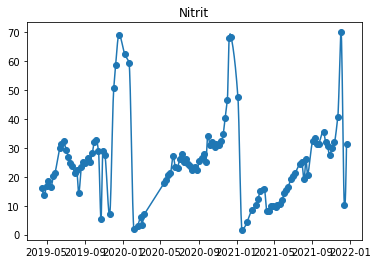

In [8]:
#interpolation
key='Nitrit'
#dfd = df.drop('Datetime',axis=1)
keys_float = df.keys().drop('Datetime')
dfi = df.copy()
dfi[keys_float] = df[keys_float].interpolate(method='akima', limit_direction='forward', axis=0)
#drop the keys that were added in 2020
dfi.drop(columns=['mean_phy','cv_phy_day','cv_phy_depth','mean_phycoer','cv_phycoer_day','cv_phycoer_depth','TOC'],
         inplace=True,errors='ignore')
dfi.dropna(inplace=True)
dfi.reset_index(inplace=True,drop=True)
plt.scatter(df['Datetime'],df[key])
plt.plot(dfi['Datetime'],dfi[key])
plt.title(key)
plt.show()

In [11]:
dfi

,Datetime,asplanchna,asterionella,brachionus,diatom_chain,dinobryon,eudiaptomus,kellikottia,keratella_quadrata,nauplius,...,mean_epi_temp,cv_epi_temp,mean_mixed_layer_depth,cv_mixed_layer_depth,ml_irradiance,mean_oxycline_depth,cv_oxycline_depth,year,month,day
0,2019-04-17,0.006528,0.000764,0.000278,0.000069,0.003194,0.007431,0.004583,0.000556,0.125069,...,10.073716,0.036820,3.370000,0.205739,67.570406,17.15,0.0,2019,4,17
1,2019-04-18,0.003264,0.000625,0.000208,0.000208,0.003333,0.010208,0.003333,0.000417,0.106111,...,10.330687,0.060581,3.073125,0.080429,60.008747,17.15,0.0,2019,4,18
2,2019-04-19,0.002847,0.000417,0.000556,0.000208,0.002014,0.010208,0.002917,0.000347,0.055000,...,11.060559,0.031378,2.894375,0.081955,63.220667,17.15,0.0,2019,4,19
3,2019-04-20,0.002083,0.000486,0.000417,0.000139,0.003333,0.010556,0.003125,0.000347,0.079167,...,11.307735,0.052381,3.304286,0.199573,48.214657,17.15,0.0,2019,4,20
4,2019-04-21,0.001736,0.000417,0.000625,0.000000,0.003264,0.015694,0.002014,0.000625,0.048194,...,11.533606,0.031662,2.798125,0.056845,74.082090,17.15,0.0,2019,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2021-12-16,0.001458,0.000139,0.000417,0.000764,0.000556,0.004306,0.002431,0.001250,0.014097,...,6.407001,0.002118,2.750000,0.051426,1.849623,17.15,0.0,2021,12,16
975,2021-12-17,0.001806,0.000208,0.000208,0.000278,0.000833,0.004583,0.002500,0.001250,0.012778,...,6.370917,0.001509,3.175000,0.253767,5.010993,17.15,0.0,2021,12,17
976,2021-12-18,0.001389,0.000208,0.000278,0.000000,0.000833,0.005347,0.001319,0.000903,0.017778,...,6.271784,0.010008,2.650000,0.000000,21.654374,17.15,0.0,2021,12,18
977,2021-12-19,0.001250,0.000139,0.000069,0.000000,0.000694,0.005347,0.000972,0.000694,0.014653,...,6.167297,0.001630,3.775000,0.560845,4.758864,17.15,0.0,2021,12,19


In [1]:
def Xy_from_df(df,lags=[1],inkeys=['mean_chla'],outkeys=['mean_chla']):
    maxlag = max(lags)
    
    #drop all outputs that cannot have inputs
    y = df[df['Datetime']-np.timedelta64(maxlag,'D')>=df['Datetime'][0]][['Datetime']+outkeys]
    y.reset_index(inplace=True,drop=True)
    
    X = np.zeros((y.shape[0],len(inkeys),len(lags)))
    for i,yi in y.iterrows():
        for j,lag in enumerate(lags):
            X[i,:,j] = df[df['Datetime']==yi['Datetime']-np.timedelta64(lag,'D')][inkeys]
    #now that Xs and ys are created, we can drop the dates.
    y = y.drop(columns=['Datetime'],errors='ignore')
    y = np.array(y)
    y = np.squeeze(y)
    #flatten X:
    return X,y


X,y = Xy_from_df(dfi,lags=[1],inkeys=dfi.keys().drop(['Datetime']),outkeys=['mean_chla'])

def R2(trues,preds):
    errs2 = np.sum(np.sum(np.square(trues-preds)))
    tot2 = np.sum(np.sum(np.square(trues-np.mean(trues))))
    return 1-errs2/(tot2+0.00001)

NameError: name 'dfi' is not defined

In [183]:
def input_pipeline(dfi,inkeys, lags,outkeys='mean_chla'):
    #build train and val datasets
    X,y = Xy_from_df(dfi,lags,inkeys,outkeys)
    Xt,Xv,yt,yv= sklearn.model_selection.train_test_split(X,y, test_size=0.2, shuffle=False)
    #normalize :
    meanX = np.mean(Xt,0)
    Xt-=meanX
    Xv-=meanX
    stdX = np.std(Xt,0)
    Xt/=stdX
    Xv/=stdX
    meany = np.mean(yt,0)
    yt-=meany
    yv-=meany
    stdy = np.std(yt,0)
    yt/=stdy
    yv/=stdy

    #flatten X
    Xt = Xt.reshape(Xt.shape[0],-1)
    Xv = Xv.reshape(Xv.shape[0],-1)
    
    return Xt,Xv,yt,yv

In [198]:
Xt,Xv,yt,yv = input_pipeline(dfi,inkeys=keys_imp, lags=[5,6,7,8,9,10],outkeys=['mean_chla'])

In [199]:
model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)
model.fit(Xt,yt)

RandomForestRegressor(n_estimators=1000)

In [200]:
model.score(Xv,yv)

0.8800577321980562

In [202]:
lags = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
model = sklearn.ensemble.RandomForestRegressor(n_estimators=500)
score_l = []
for minlag in range(15):
    print(minlag,end='\r')
    rlags = lags+minlag
    Xt,Xv,yt,yv = input_pipeline(dfi,inkeys=keys_imp, lags=rlags,outkeys=['mean_chla'])
    model.fit(Xt,yt)
    score_l.append(model.score(Xv,yv))

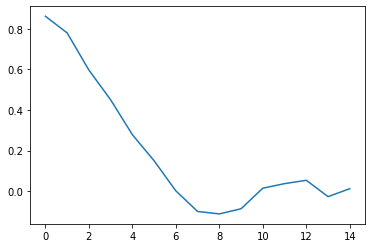

In [203]:
plt.plot(score_l)

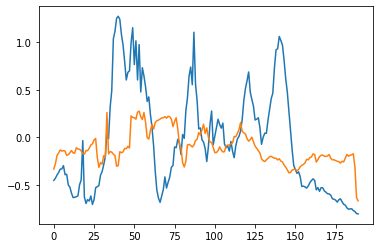

In [207]:
plt.plot(yv)
plt.plot(model.predict(Xv))